<a href="https://colab.research.google.com/github/e-liw/szkolenie_python/blob/main/Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import RandomForestClassifier
import time
import matplotlib.pyplot as plt


In [2]:
n_jobs = -1
data = fetch_olivetti_faces()
X,y = data.data, data.target

mask = y<5
X = X[mask]
y = y[mask]


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
forest = RandomForestClassifier(n_estimators=750, #liczba drzew
                                n_jobs=n_jobs,
                                random_state=42
)
forest.fit(X,y)


RandomForestClassifier(n_estimators=750, n_jobs=-1, random_state=42)

In [4]:
#czas analizy obrazu
start_time = time.time()
img_shape = data.images[0].shape
importances = forest.feature_importances_
elapsed_time = time.time() - start_time

Czas obliczenia istotnych pikseli: 0.229 sekund


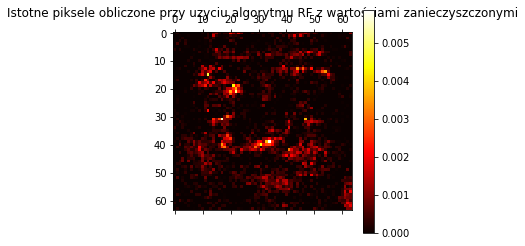

In [5]:
print(f"Czas obliczenia istotnych pikseli: {elapsed_time:.3f} sekund")
img_reshaped = importances.reshape(img_shape)
plt.matshow(img_reshaped, cmap = plt.cm.hot)
plt.title("Istotne piksele obliczone przy uzyciu algorytmu RF z wartościami zanieczyszczonymi")
plt.colorbar()
plt.show()